# Introduction to Statsmodels

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at <a href='https://www.statsmodels.org/stable/index.html'>statsmodels.org</a>.

<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='http://www.statsmodels.org/stable/tsa.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis</font></div>


### Perform standard imports and load the dataset
For these exercises we'll be using a statsmodels built-in macroeconomics dataset:

<pre><strong>US Macroeconomic Data for 1959Q1 - 2009Q3</strong>
Number of Observations - 203
Number of Variables - 14
Variable name definitions:
    year      - 1959q1 - 2009q3
    quarter   - 1-4
    realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                seasonally adjusted annual rate)
    realcons  - Real personal consumption expenditures (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realinv   - Real gross private domestic investment (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realgovt  - Real federal consumption expenditures & gross investment
                (Bil. of chained 2005 US$, seasonally adjusted annual rate)
    realdpi   - Real private disposable income (Bil. of chained 2005
                US$, seasonally adjusted annual rate)
    cpi       - End of the quarter consumer price index for all urban
                consumers: all items (1982-84 = 100, seasonally adjusted).
    m1        - End of the quarter M1 nominal money stock (Seasonally
                adjusted)
    tbilrate  - Quarterly monthly average of the monthly 3-month
                treasury bill: secondary market rate
    unemp     - Seasonally adjusted unemployment rate (%)
    pop       - End of the quarter total population: all ages incl. armed
                forces over seas
    infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
    realint   - Real interest rate (tbilrate - infl)</pre>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = sm.datasets.macrodata.load_pandas().data
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [ ]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-31 to 2009-09-30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    float64
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(14)
memory usage: 23.8 KB


### Plot the dataset

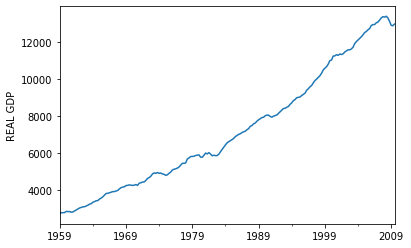

In [ ]:
ax = df['realgdp'].plot()
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='REAL GDP');

## Using Statsmodels to get the trend
<div class="alert alert-info"><h3>Related Function:</h3>
<tt><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html'><strong>statsmodels.tsa.filters.hp_filter.hpfilter</strong></a><font color=black>(X, lamb=1600)</font>&nbsp;&nbsp;Hodrick-Prescott filter</div>
    
The <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Hodrick-Prescott filter</a> separates a time-series  $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$

$y_t = \tau_t + c_t$

The components are determined by minimizing the following quadratic loss function, where $\lambda$ is a smoothing parameter:

$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$


The $\lambda$ value above handles variations in the growth rate of the trend component.<br>When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [ ]:
gdp_cycle.head()

1959-03-31    39.511915
1959-06-30    80.088532
1959-09-30    48.875455
1959-12-31    30.591933
1960-03-31    64.882667
Name: realgdp, dtype: float64

In [ ]:
type(gdp_cycle)

pandas.core.series.Series

In [ ]:
df['trend'] = gdp_trend

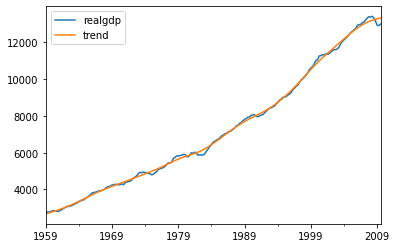

In [ ]:
df[['realgdp','trend']].plot().autoscale(axis='x',tight=True);

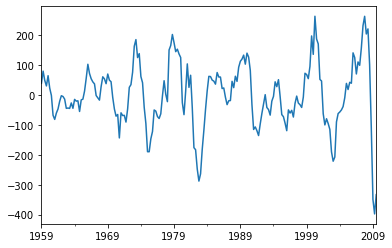

In [ ]:
gdp_cycle.plot().autoscale(axis='x',tight=True);

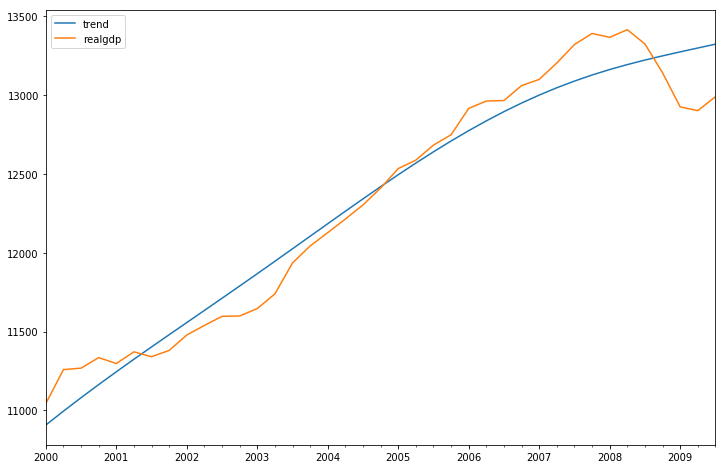

In [ ]:
df[['trend','realgdp']]['2000-03-31':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);